-Titanic Survival Analysis

- Objective

Analyze Titanic passenger data to understand who had higher chances of survival:
- By Gender
- By Passenger Class
- By Age Groups

We will also clean the dataset, visualize patterns, and write insights.


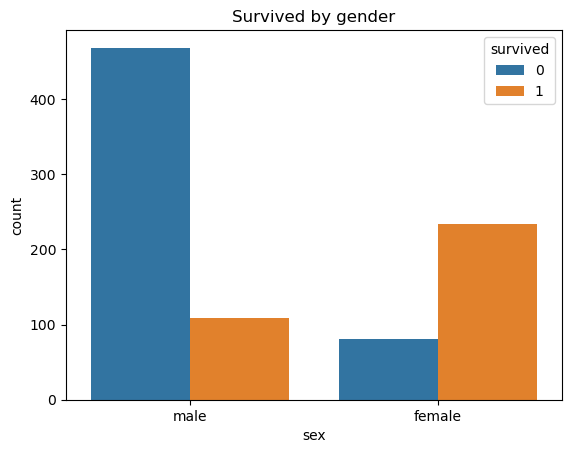

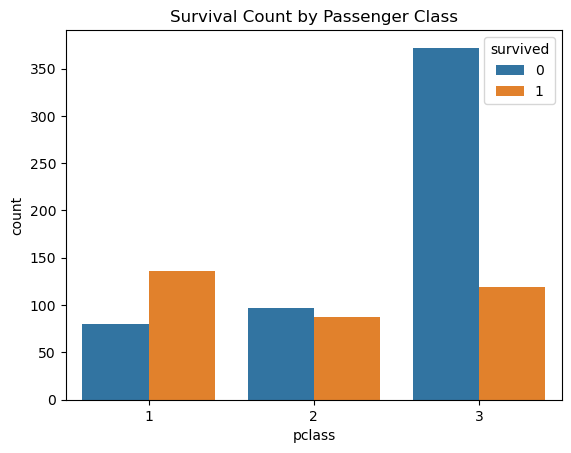

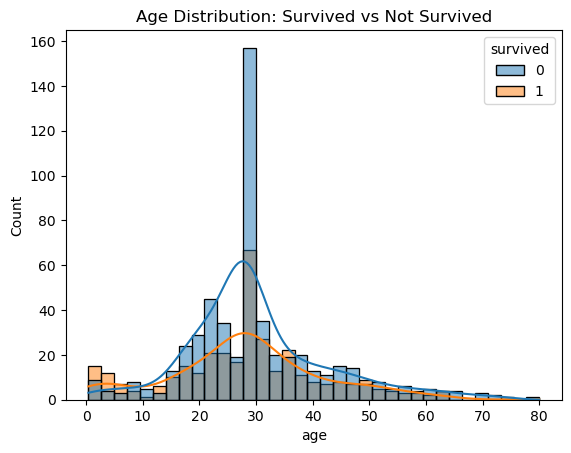

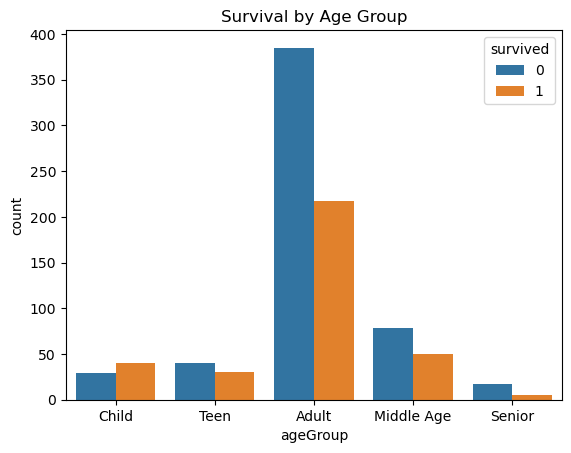

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("titanic")

df

df["age"] = df["age"].fillna(df["age"].median())

df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

df.drop(columns=["deck"], inplace=True)

df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

sns.countplot(x="sex", hue="survived", data=df)
plt.title("Survived by gender")
plt.show()

sns.countplot(x="pclass", hue="survived", data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

sns.histplot(data=df, x="age", hue="survived", bins=35, kde=True)
plt.title("Age Distribution: Survived vs Not Survived")
plt.show()

df["ageGroup"] = pd.cut(df["age"], bins=[0,12,18,40,60,80],
                        labels=["Child","Teen","Adult","Middle Age","Senior"])

sns.countplot(x="ageGroup", hue="survived", data=df)
plt.title("Survival by Age Group")
plt.show()

 Key Insights

1. **Gender**  
   - Females had a much higher survival rate than males.  

2. **Passenger Class**  
   - 1st class passengers survived more often than 2nd and 3rd class.  

3. **Age Groups**  
   - Children had better survival chances than adults.  
   - Seniors had the lowest survival rate.  


In [67]:
df.to_csv("titanic_cleaned.csv", index=False)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,ageGroup
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,Adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,Adult
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False,Adult
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,Adult
